# Homework 3 Questions

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import re

In [27]:
df_2024 = pd.read_csv('Dataset Generation (2024) (Responses) - Form Responses 1.csv')
df_fardina = pd.read_csv('Dataset Generation (Fardina) (Responses) - Form Responses 1.csv')
df_max = pd.read_csv('Dataset Generation (Max) (Responses) - Form Responses 1.csv')

Data cleaning:

In [28]:
df_2024.drop_duplicates(inplace=True)
df_fardina.drop_duplicates(inplace=True)
df_max.drop_duplicates(inplace=True)

df_2024.dropna(inplace=True)
df_fardina.dropna(inplace=True)
df_max.dropna(inplace=True)

short_cols = ['Time', 'Year', 'Age', 'Politics of Parents', 'Politics of Self', 'Spirituality', 'Gender', 'Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q3: Trust Fund Split 50/50', 'Q4: Schooling Seperate Finances', 'Q5: Lost Cat, No Reward', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q10: Expensive School, Cheap Career', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']  

df_fardina_non_priming = pd.DataFrame()
df_fardina_non_priming[df_fardina.columns.to_list()[0:7] + df_fardina.columns.to_list()[8:]] = df_fardina[df_fardina.columns.to_list()[0:7] + df_fardina.columns.to_list()[8:]]

fardina_cols = df_fardina_non_priming.columns.to_list()
max_cols = df_max.columns.to_list()
fardina_col_mapping = dict(zip(fardina_cols, short_cols))
max_col_mapping = dict(zip(max_cols, short_cols))

df_fardina_final = df_fardina_non_priming.rename(columns=fardina_col_mapping)
df_max_final = df_max.rename(columns=max_col_mapping)

df_2023_final = pd.concat([df_fardina_final, df_max_final])
df_2023_final['Gender'] = df_2023_final['Gender'].apply(func=lambda s: s.replace('Famale', 'Female'))

str_replace = lambda s: s.replace('religious', 'spiritual') if isinstance(s, str) else s
df_2024['How would you rate your religiousness?'] = df_2024['How would you rate your religiousness?'].apply(func=str_replace)

d2024_cols = df_2024.columns.to_list()
d2024_col_mapping = dict(zip(d2024_cols, short_cols))
df_2024_final = df_2024.rename(columns=d2024_col_mapping)

df_all = pd.concat([df_2023_final, df_2024_final])
df_all['Year'] = df_all['Year'].apply(func=lambda s: s.replace('Other', 'Graduate Student'))

df_fardina_priming_final = df_fardina_final.copy()
df_fardina_priming_final['Compassionate'] = df_fardina['Would you describe yourself as compassionate?']

1. Create a graph telling a story about students political beliefs vs. their parents.

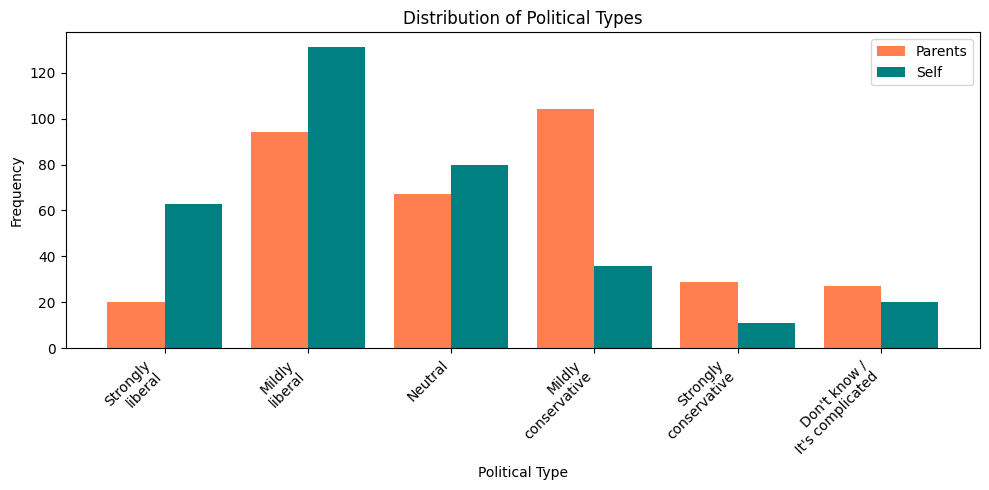

In [29]:
political_order = ['Strongly liberal', 'Mildly liberal', 'Neutral', 'Mildly conservative', 'Strongly conservative', 'Don\'t know / It\'s complicated']

df_all['Politics of Parents'] = pd.Categorical(df_all['Politics of Parents'], categories=political_order, ordered=True)
df_all['Politics of Self'] = pd.Categorical(df_all['Politics of Self'], categories=political_order, ordered=True)

parents_counts = df_all['Politics of Parents'].value_counts(sort=False)
self_counts = df_all['Politics of Self'].value_counts(sort=False)

plt.figure(figsize=(10, 5))
bar_width = 0.4

index = np.arange(len(political_order))

plt.bar(index - bar_width/2, parents_counts, bar_width, label='Parents', color='coral')
plt.bar(index + bar_width/2, self_counts, bar_width, label='Self', color='teal')

political_order_lst = ['Strongly\nliberal', 'Mildly\nliberal', 'Neutral', 'Mildly\nconservative', 'Strongly\nconservative', 'Don\'t know /\n It\'s complicated']
plt.xticks(index, political_order_lst, rotation=45, ha='right')
plt.xlabel('Political Type')
plt.ylabel('Frequency')
plt.title('Distribution of Political Types')
plt.legend()
plt.tight_layout()

plt.show()

2. Show the percent of each answer for the political beliefs over all the respondants (so the percent of liberals, conservatives, etc).

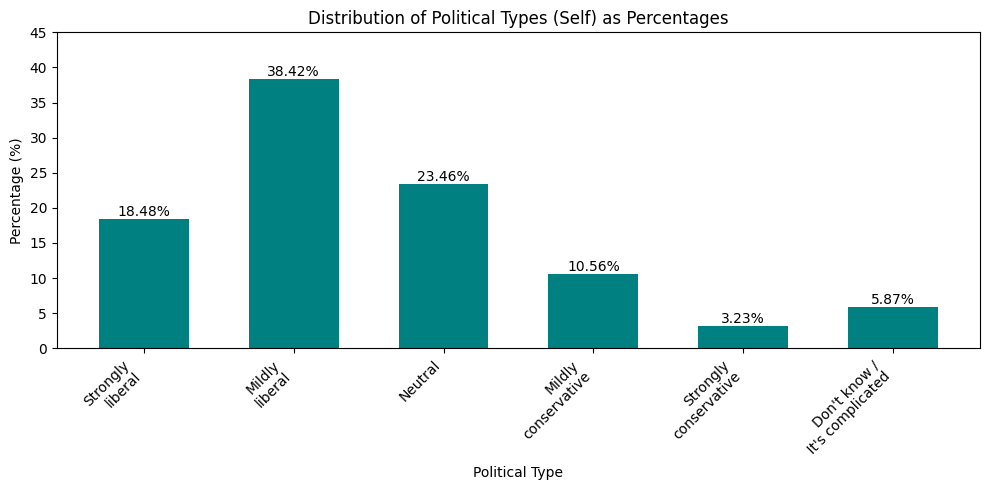

In [30]:
val_dict = df_all['Politics of Self'].value_counts().to_dict()
val_tot = sum(val_dict.values())

for key, val in val_dict.items():
    val_dict[key] = round(val / val_tot, 4) * 100

# Set up the figure
plt.figure(figsize=(10, 5))
bar_width = 0.6

# Define the positions for the groups
index = np.arange(len(political_order))

# Plot bars with percentages for "Politics of Self"
self_percentages = [val_dict.get(category, 0) for category in political_order] 

bars = plt.bar(index, self_percentages, bar_width, label='Self', color='teal')

# Customize the plot
plt.xticks(index, political_order_lst, rotation=45, ha='right')
plt.yticks(np.arange(0, 46, 5))
plt.xlabel('Political Type')
plt.ylabel('Percentage (%)')  # Updated label to indicate percentages
plt.title('Distribution of Political Types (Self) as Percentages')

# Add percentages on top of each bar
for bar, percentage in zip(bars, self_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

3. Does the priming question have a statistically significant effect on any questions? If so, which ones?

Your answer here:

<Figure size 1200x500 with 0 Axes>

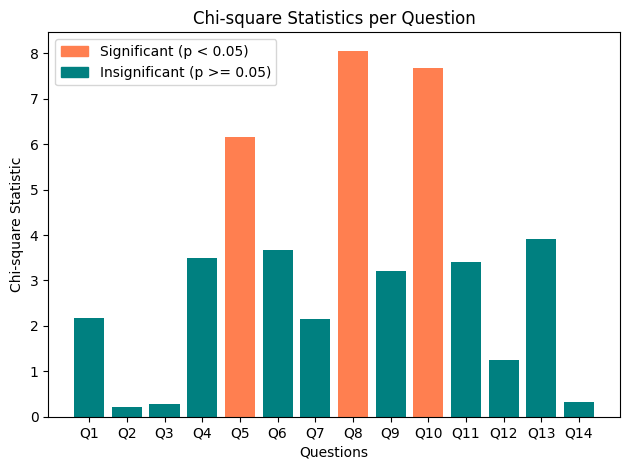

Significant Questions (p < 0.05)
--------------------------------
Q5: Lost Cat, No Reward
Q8: Single Parent, Four Kids
Q10: Expensive School, Cheap Career


In [31]:
import matplotlib.patches as mpatches

ct_priming = []

for i in range(7, len(short_cols[7:])+7):
    ct_priming.append(pd.crosstab(df_fardina_priming_final['Compassionate'], df_fardina_priming_final[short_cols[i]]))


chi_square_stats_priming = []
p_values_priming = []
questions_priming = []

i = 1
for ct in ct_priming:
    chi2, p, dof, expected = chi2_contingency(ct)
    chi_square_stats_priming.append(chi2)
    p_values_priming.append(p)
    questions_priming.append(f"Q{i}")
    # print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1

plt.figure(figsize=(12,5))
fig, ax = plt.subplots()

colors = ['coral' if p < 0.05 else 'teal' for p in p_values_priming]
ax.bar(questions_priming, chi_square_stats_priming, color=colors)

ax.set_xlabel('Questions')
ax.set_ylabel('Chi-square Statistic')
ax.set_title('Chi-square Statistics per Question')
red_patch = mpatches.Patch(color='coral', label='Significant (p < 0.05)')
blue_patch = mpatches.Patch(color='teal', label='Insignificant (p >= 0.05)')
ax.legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

significant_questions = [short_cols[7+i] for i, p in enumerate(p_values_priming) if p < 0.05]
print("Significant Questions (p < 0.05)")
print("-"*32)
for i in range(len(significant_questions)):
    print(f"{significant_questions[i]}")

4. Does swapping genders have a stastically significant effect on any questions? If so, which ones?

Your answer here:

<Figure size 1200x500 with 0 Axes>

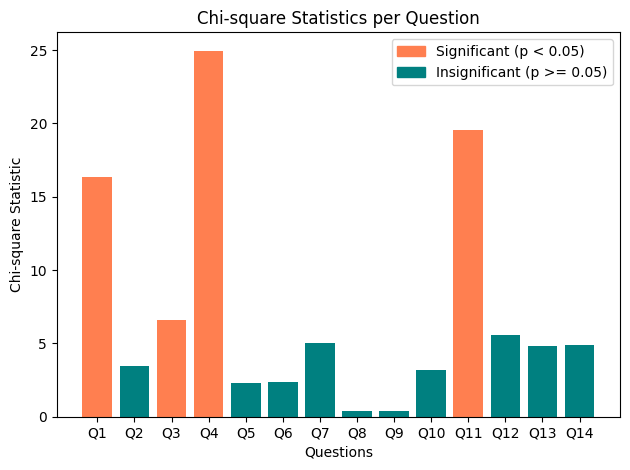

Significant Questions (p < 0.05)
--------------------------------
Q1: Ignored Knee Pain
Q3: Trust Fund Split 50/50
Q4: Schooling Seperate Finances
Q11: Ex Wedding Invitation Revoked


In [32]:
ct_swapped = []

for question in short_cols[7:]:
    conts_2023 = df_2023_final[question].value_counts()
    conts_2024 = df_2024_final[question].value_counts()
    
    ct_swapped.append(pd.DataFrame([conts_2023, conts_2024], index=['2023', '2024']))

chi_square_stats_gender_swap = []
p_values_gender_swap = []
questions_gender_swap = []

i = 1
for ct in ct_swapped:
    chi2, p, dof, expected = chi2_contingency(ct)
    chi_square_stats_gender_swap.append(chi2)
    p_values_gender_swap.append(p)
    questions_gender_swap.append(f"Q{i}")
    # print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1

plt.figure(figsize=(12,5))
fig, ax = plt.subplots()

colors = ['coral' if p < 0.05 else 'teal' for p in p_values_gender_swap]
ax.bar(questions_gender_swap, chi_square_stats_gender_swap, color=colors)

ax.set_xlabel('Questions')
ax.set_ylabel('Chi-square Statistic')
ax.set_title('Chi-square Statistics per Question')
red_patch = mpatches.Patch(color='coral', label='Significant (p < 0.05)')
blue_patch = mpatches.Patch(color='teal', label='Insignificant (p >= 0.05)')
ax.legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

significant_questions = [short_cols[7+i] for i, p in enumerate(p_values_gender_swap) if p < 0.05]
print("Significant Questions (p < 0.05)")
print("-"*32)
for i in range(len(significant_questions)):
    print(f"{significant_questions[i]}")

5. What hour of the day were most of the surveys completed?

Your answer here:

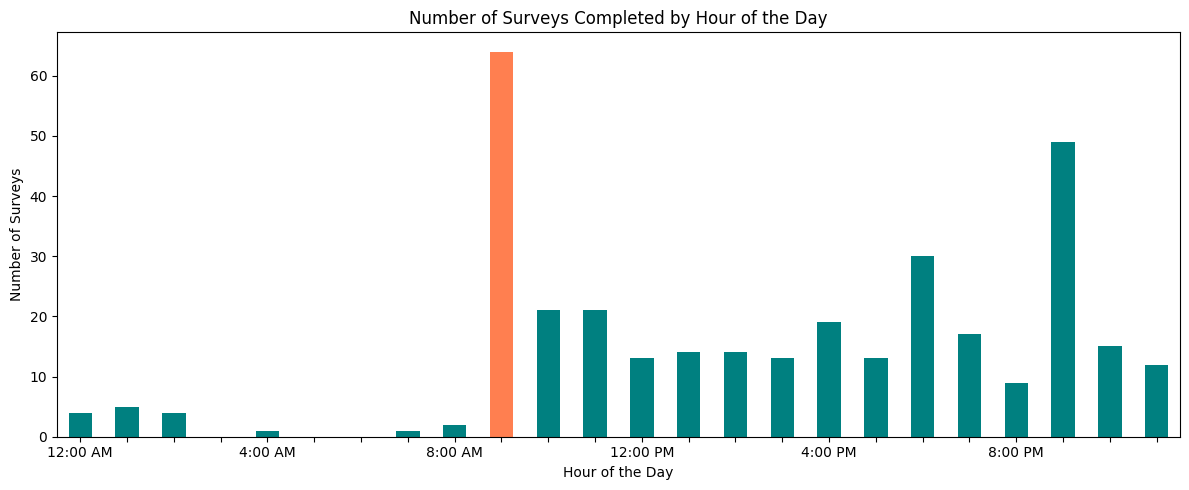

The maximum number of surveys completed during the day was 64 from 9:00 AM to 9:59 AM.


In [33]:
df_time = pd.DataFrame()
df_all['Time'] = pd.to_datetime(df_all['Time'])
df_time['Hour'] = df_all['Time'].dt.hour
hour_counts = df_time['Hour'].value_counts().sort_index()
hour_counts = hour_counts.reindex(range(24), fill_value=0)

hour_counts_lst = hour_counts.to_list()
max_surveys = max(hour_counts_lst)
max_index = hour_counts_lst.index(max_surveys)

colors = ['teal' if i != max_index else 'coral' for i in range(24)]
time_labels_skipped = ['12:00 AM', '', '', '', '4:00 AM', '', '', '', '8:00 AM', 
               '', '', '', '12:00 PM', '', '', '', '4:00 PM', '',
               '', '', '8:00 PM', '', '', '']

plt.figure(figsize=(12,5))
hour_counts.plot(kind='bar', color=colors)

plt.title('Number of Surveys Completed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Surveys')
plt.xticks(ticks=range(24), labels=time_labels_skipped, rotation=0)
plt.tight_layout()
plt.show()

if max_index >= 12:
    hour = max_index - 12 
    period = "PM"
else:
    hour = max_index
    period = "AM"

time_string = f"from {hour}:00 {period} to {hour}:59 {period}"

print(f"The maximum number of surveys completed during the day was {max_surveys} {time_string}.")

6. Which two questions in this semester's data have the most correlated answer?

Your answer:

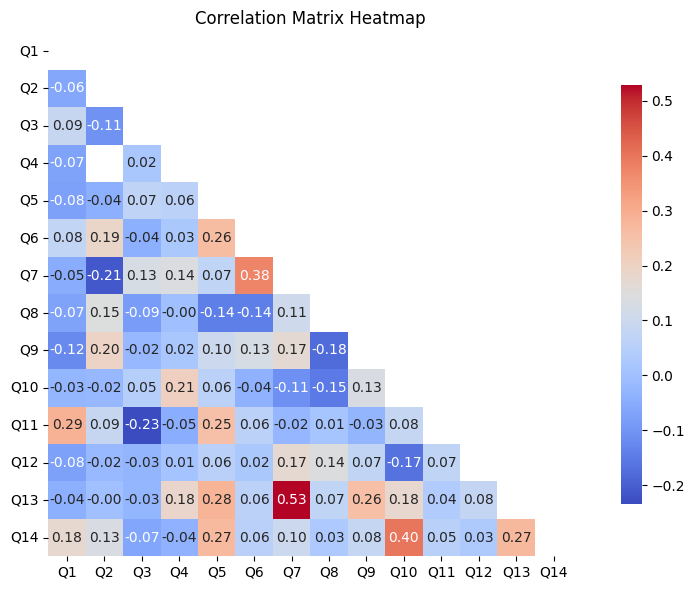

The two questions with the most correlated answer are:
- Q7
- Q13
with a correlation coefficient of 0.5288.


In [34]:
category_mapping = {
    'Strongly a jerk': 2,
    'Middle a jerk': 1,
    'Not a jerk': 0
}

df_corr = pd.DataFrame()
for col in short_cols[7:]:
    df_corr[re.match(r'(Q\d+)', col).group(1)] = df_2024_final[col].map(category_mapping)

corr_matrix = df_corr.corr()

corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr_value = corr_matrix_upper.max().max() 
max_corr_indices = corr_matrix_upper.stack().idxmax()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"The two questions with the most correlated answer are:\n- {max_corr_indices[0]}\n- {max_corr_indices[1]}\nwith a correlation coefficient of {round(max_corr_value, 4)}.")

7. Which two questions this semseter had the highest covariance?

Your answer:

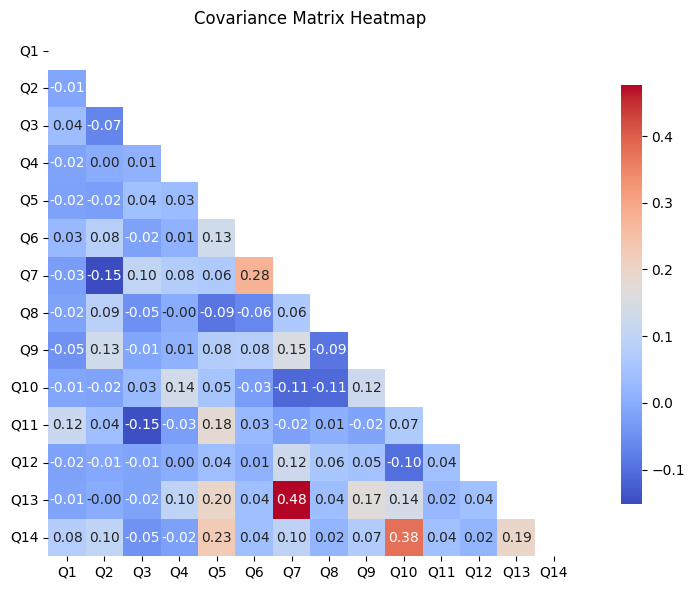

The two questions with the highest covariance are
- Q7
- Q13
with a covariance of 0.4769.


In [35]:
category_mapping = {
    'Strongly a jerk': 2,
    'Middle a jerk': 1,
    'Not a jerk': 0
}

df_cov = pd.DataFrame()
for col in short_cols[7:]:
    df_cov[re.match(r'(Q\d+)', col).group(1)] = df_2024_final[col].map(category_mapping)

cov_matrix = df_cov.cov()

cov_matrix_upper = cov_matrix.where(np.triu(np.ones(cov_matrix.shape), k=1).astype(bool))
max_cov_value = cov_matrix_upper.max().max() 
max_cov_indices = cov_matrix_upper.stack().idxmax()

plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, mask=np.triu(np.ones_like(cov_matrix, dtype=bool)))
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"The two questions with the highest covariance are\n- {max_cov_indices[0]}\n- {max_cov_indices[1]}\nwith a covariance of {round(max_cov_value, 4)}.")

8. Which question this semseter was most strongly influenced by respondants religious views?

Your answer:

<Figure size 1200x500 with 0 Axes>

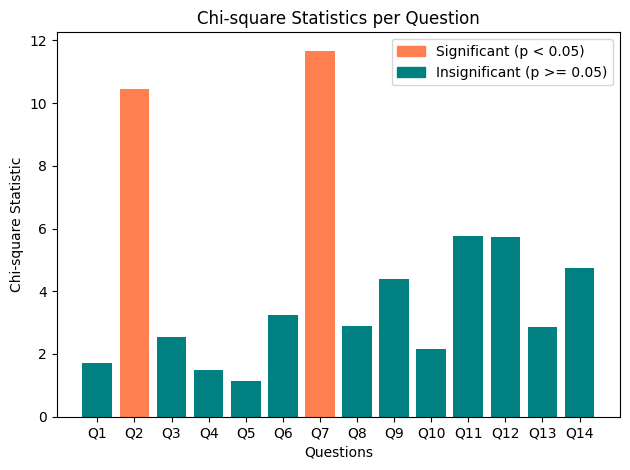

Significant Questions (p < 0.05)
--------------------------------
Q2: Rejected Aisle Walk
Q7: Business Class Over Kids


In [36]:
ct_religious = []

for i in range(7, len(short_cols[7:]) + 7):
    ct_religious.append(pd.crosstab(df_2024_final['Spirituality'], df_2024_final[short_cols[i]]))

chi_square_stats_religious = []
p_values_religious = []
questions_religious = []

i = 1
for ct in ct_religious:
    chi2, p, dof, expected = chi2_contingency(ct)
    chi_square_stats_religious.append(chi2)
    p_values_religious.append(p)
    questions_religious.append(f"Q{i}")
    # print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1

plt.figure(figsize=(12,5))
fig, ax = plt.subplots()

colors = ['coral' if p < 0.05 else 'teal' for p in p_values_religious]
ax.bar(questions_religious, chi_square_stats_religious, color=colors)

ax.set_xlabel('Questions')
ax.set_ylabel('Chi-square Statistic')
ax.set_title('Chi-square Statistics per Question')
red_patch = mpatches.Patch(color='coral', label='Significant (p < 0.05)')
blue_patch = mpatches.Patch(color='teal', label='Insignificant (p >= 0.05)')
ax.legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

significant_questions = [short_cols[7+i] for i, p in enumerate(p_values_religious) if p < 0.05]
print("Significant Questions (p < 0.05)")
print("-"*32)
for i in range(len(significant_questions)):
    print(f"{significant_questions[i]}")

9. Are there any questions where graduate students had a stastically signifant difference from undergraduate students? If so, which ones?

Your answer:

<Figure size 1200x500 with 0 Axes>

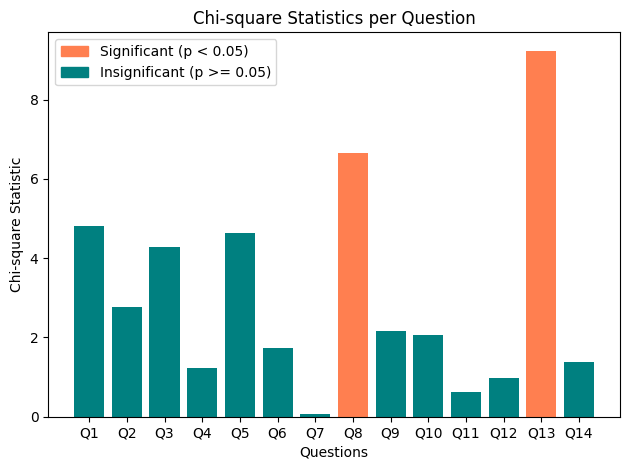

Significant Questions (p < 0.05)
--------------------------------
Q8: Single Parent, Four Kids
Q13: Pregnant Wife, No Drinks


In [37]:
df_year_bins = pd.DataFrame()
df_year_bins = pd.concat([df_all['Year'], df_all[short_cols[7:]]], axis=1)

def categorize_type_of_year(year):
    if year == 'Graduate Student':
        return 'Graduate' 
    else:
        return 'Undergraduate'  

df_year_bins['Year Bin'] = df_year_bins['Year'].apply(func=categorize_type_of_year)

ct_year_bins = []

for i in range(7, len(short_cols[7:]) + 7):
    ct_year_bins.append(pd.crosstab(df_year_bins['Year Bin'], df_year_bins[short_cols[i]]))

chi_square_stats_year_bins = []
p_values_year_bins = []
questions_year_bins = []

i = 1
for ct in ct_year_bins:
    chi2, p, dof, expected = chi2_contingency(ct)
    chi_square_stats_year_bins.append(chi2)
    p_values_year_bins.append(p)
    questions_year_bins.append(f"Q{i}")
    # print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1

plt.figure(figsize=(12,5))
fig, ax = plt.subplots()

colors = ['coral' if p < 0.05 else 'teal' for p in p_values_year_bins]
ax.bar(questions_year_bins, chi_square_stats_year_bins, color=colors)

ax.set_xlabel('Questions')
ax.set_ylabel('Chi-square Statistic')
ax.set_title('Chi-square Statistics per Question')
red_patch = mpatches.Patch(color='coral', label='Significant (p < 0.05)')
blue_patch = mpatches.Patch(color='teal', label='Insignificant (p >= 0.05)')
ax.legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

significant_questions = [short_cols[7+i] for i, p in enumerate(p_values_year_bins) if p < 0.05]
print("Significant Questions (p < 0.05)")
print("-"*32)
for i in range(len(significant_questions)):
    print(f"{significant_questions[i]}")


Your answer:

<Figure size 1200x500 with 0 Axes>

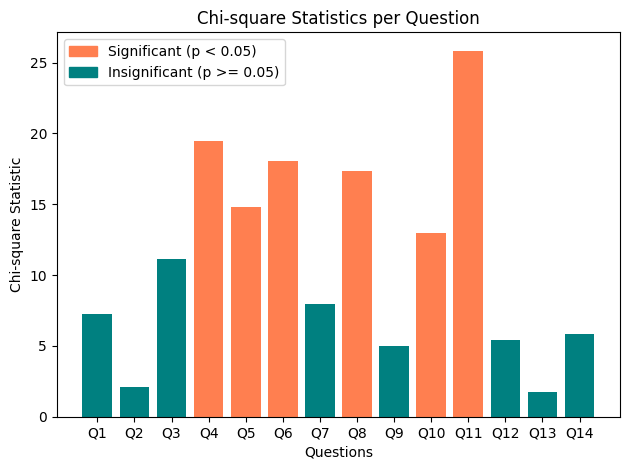

Significant Questions (p < 0.05)
--------------------------------
Q4: Schooling Seperate Finances
Q5: Lost Cat, No Reward
Q6: Surprisig Child Drop-Off
Q8: Single Parent, Four Kids
Q10: Expensive School, Cheap Career
Q11: Ex Wedding Invitation Revoked


In [38]:
df_time_bins = pd.DataFrame()
df_time_bins = pd.concat([df_all['Time'], df_all[short_cols[7:]]], axis=1)

df_time_bins['Time'] = pd.to_datetime(df_time_bins['Time'])
df_time_bins['Hour'] = df_time_bins['Time'].dt.hour
df_time_bins['Minute'] = df_time_bins['Time'].dt.minute
df_time_bins['Second'] = df_time_bins['Time'].dt.second

def categorize_time_of_day(hour, minute, second):
    time_tuple = (hour, minute, second)

    if (6, 0, 0) <= time_tuple <= (11, 59, 59):
        return 'Morning'
    elif (12, 0, 0) <= time_tuple <= (16, 59, 59):
        return 'Afternoon'
    elif (17, 0, 0) <= time_tuple <= (21, 59, 59):
        return 'Evening'
    else:
        return 'Night'

df_time_bins['Time of Day'] = df_time_bins.apply(lambda row: categorize_time_of_day(row['Hour'], row['Minute'], row['Second']), axis=1)


ct_time_bins = []

for i in range(7, len(short_cols[7:])+7):
    ct_time_bins.append(pd.crosstab(df_time_bins['Time of Day'], df_time_bins[short_cols[i]]))

chi_square_stats_time_bins = []
p_values_time_bins = []
questions_time_bins = []

i = 1
for ct in ct_time_bins:
    chi2, p, dof, expected = chi2_contingency(ct)
    chi_square_stats_time_bins.append(chi2)
    p_values_time_bins.append(p)
    questions_time_bins.append(f"Q{i}")
    # print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1

plt.figure(figsize=(12,5))
fig, ax = plt.subplots()

colors = ['coral' if p < 0.05 else 'teal' for p in p_values_time_bins]
ax.bar(questions_time_bins, chi_square_stats_time_bins, color=colors)

ax.set_xlabel('Questions')
ax.set_ylabel('Chi-square Statistic')
ax.set_title('Chi-square Statistics per Question')
red_patch = mpatches.Patch(color='coral', label='Significant (p < 0.05)')
blue_patch = mpatches.Patch(color='teal', label='Insignificant (p >= 0.05)')
ax.legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

significant_questions = [short_cols[7+i] for i, p in enumerate(p_values_time_bins) if p < 0.05]
print("Significant Questions (p < 0.05)")
print("-"*32)
for i in range(len(significant_questions)):
    print(f"{significant_questions[i]}")

In [44]:
df_all['Gender'].value_counts().size

4